# Fontes legais da internet para ler antes de fazer


[How to Run the Chi-Square Test in Python - George Pipis
](https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d) <br>
[Documentação da função Chi2 da Biblioteca Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)<br>
[Explicação do que é Coeficiente de Phi](https://www.statology.org/phi-coefficient/)<br>
[Correlações em Python - Direto ao Ponto - Rodrigo Salles](https://medium.com/brdata/correlation-straight-to-the-point-e692ab601f4c)<br>
[Pacote 'Association Metrics' Desenvolvido pelo MIT](https://pypi.org/project/association-metrics/)


# Importando os dados

In [30]:
import pandas as pd #estamos importando o pacote pandas, que faz tabelas bonitas no Python, com um apelido de 'pd'
import numpy as np  #estamos importando o pacote numpy, que faz algumas funçõeszinhas legais (soma, divisão, exponenciação, etc...), com um apelido de 'np'

#Ou seja, todas as vezes que vocês verem 'np' ou 'pd' estamos usando alguma coisa desses pacotes

Siga o passo a passo abaixo para importar o arquivo da questão na sessão Colab que está usando

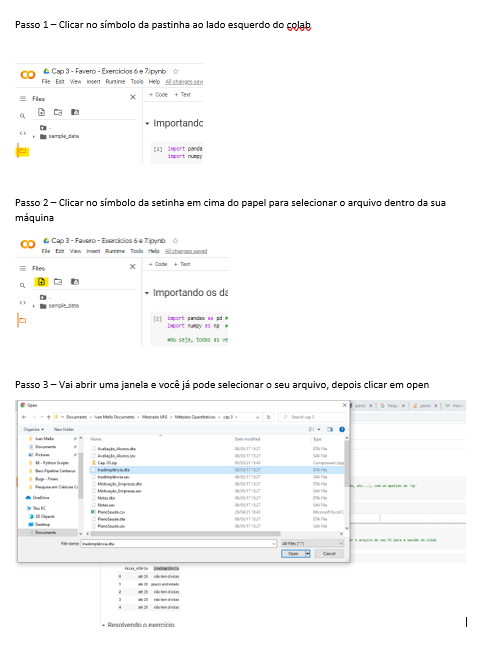

In [31]:
#Dentro do pacote pandas que gera tabelas bonitas, existe a opção de lermos um arquivo do stata 'pd.read_stata'
### veja como é simples no passo abaixo
### ps: lembre-se de clicar no símbolozinho da pasta ao lado esquerdo, depois no símbolo do arquivo com a seta, e carregar o arquivo do seu PC para a sessão do Colab
### ps2: o caminho do seu arquivo pode ser facilmente encontrado clicando com o botão direito nele e depois clicando em 'Copy Path' ou 'Copiar Caminho'
dframe_inadimplencia = pd.read_stata('/content/Inadimplência.dta')

In [32]:
# Esse comando 'head()' mostra as 5 primeiras linhas da nossa tabela bonita, que o Python chama de Dataframe.
dframe_inadimplencia.head()

,faixa_etária,inadimplência
0,até 20,não tem dívidas
1,até 20,pouco endividado
2,até 20,não tem dívidas
3,até 20,não tem dívidas
4,até 20,não tem dívidas


In [33]:
#Importando motivação empresas
dframe_motivacao_empresas = pd.read_stata('/content/Motivação_Empresas.dta')

In [34]:
# Esse comando 'head()' mostra as 5 primeiras linhas da nossa tabela bonita, que o Python chama de Dataframe.
dframe_motivacao_empresas.head()

,empresa,motivação
0,A,muito desmotivado
1,A,muito desmotivado
2,A,muito desmotivado
3,A,muito desmotivado
4,A,desmotivado


# Resolvendo o exercício

## Exercicio 6

### Tabelas de Frequência

#### Tabelas de Frequências Reais

No Python o comando crosstab faz quase que todo o trabalho, alguns pontos a se destacar sobre argumentos chave:<br>
-> se declararmos margins=True, a crosstab será gerada com totais por Linha e Coluna!<br>
-> o argumento normalize pode assumir três compartamentos<br>
>>>> 'index' -> retornará a frequencia relativa às linhas<br>
>>>> 'columns' -> retornará a frequencia relativa às colunas<br>
>>>> 'all' -> retornará a frequencia relativa ao total<br>





In [35]:
#Criando a tabela de frequência faixa_etária vs. inadimplência
##### faixa_etária será usada como índice em todos os casos

#A primeira tabela que vamos gerar abaixo apresenta as frequencias totais em qtd de ocorrências (porque não declaramos normalize e por padrão é Falso), com total de linhas e colunas (declaramos margins=True)
crosstab6a_geral = pd.crosstab(index=dframe_inadimplencia['faixa_etária'], 
            columns=dframe_inadimplencia['inadimplência'], 
            margins=True)

#A segunda tabela que vamos gerar abaixo apresenta as frequencias totais em percentual de ocorrência relativo às linhas (normalize = 'index')
crosstab6a_linhas = pd.crosstab(index=dframe_inadimplencia['faixa_etária'], 
            columns=dframe_inadimplencia['inadimplência'], 
            margins=True, normalize='index')

#A terceira tabela que vamos gerar abaixo apresenta as frequencias totais em percentual de ocorrência relativo às colunas (normalize = 'columns')
crosstab6a_colunas = pd.crosstab(index=dframe_inadimplencia['faixa_etária'], 
            columns=dframe_inadimplencia['inadimplência'], 
            margins=True, normalize='columns')

#A terceira tabela que vamos gerar abaixo apresenta as frequencias totais em percentual de ocorrência relativo ao total (normalize = 'all')
crosstab6a_totais = pd.crosstab(index=dframe_inadimplencia['faixa_etária'], 
            columns=dframe_inadimplencia['inadimplência'], 
            margins=True, normalize='all')

In [36]:
#visualizando tabela 1
crosstab6a_geral

inadimplência,não tem dívidas,pouco endividado,mais ou menos endividado,muito endividado,All
faixa_etária,,,,,
até 20,6,2,0,0,8
21 a 30,0,6,13,9,28
31 a 40,0,0,5,49,54
41 a 50,0,0,24,16,40
51 a 60,5,27,15,0,47
acima de 60,16,7,0,0,23
All,27,42,57,74,200


In [37]:
#visualizando tabela 2
crosstab6a_linhas

inadimplência,não tem dívidas,pouco endividado,mais ou menos endividado,muito endividado
faixa_etária,,,,
até 20,0.750000,0.250000,0.000000,0.000000
21 a 30,0.000000,0.214286,0.464286,0.321429
31 a 40,0.000000,0.000000,0.092593,0.907407
41 a 50,0.000000,0.000000,0.600000,0.400000
51 a 60,0.106383,0.574468,0.319149,0.000000
acima de 60,0.695652,0.304348,0.000000,0.000000
All,0.135000,0.210000,0.285000,0.370000


In [38]:
#visualizando tabela 3
crosstab6a_colunas

inadimplência,não tem dívidas,pouco endividado,mais ou menos endividado,muito endividado,All
faixa_etária,,,,,
até 20,0.222222,0.047619,0.000000,0.000000,0.040
21 a 30,0.000000,0.142857,0.228070,0.121622,0.140
31 a 40,0.000000,0.000000,0.087719,0.662162,0.270
41 a 50,0.000000,0.000000,0.421053,0.216216,0.200
51 a 60,0.185185,0.642857,0.263158,0.000000,0.235
acima de 60,0.592593,0.166667,0.000000,0.000000,0.115


In [39]:
#visualizando tabela 4
crosstab6a_totais

inadimplência,não tem dívidas,pouco endividado,mais ou menos endividado,muito endividado,All
faixa_etária,,,,,
até 20,0.030,0.010,0.000,0.000,0.040
21 a 30,0.000,0.030,0.065,0.045,0.140
31 a 40,0.000,0.000,0.025,0.245,0.270
41 a 50,0.000,0.000,0.120,0.080,0.200
51 a 60,0.025,0.135,0.075,0.000,0.235
acima de 60,0.080,0.035,0.000,0.000,0.115
All,0.135,0.210,0.285,0.370,1.000


In [71]:
print("B - Porcentagem de indivíduos entre 31 a 40 anos é {}.".format(round(crosstab6a_totais.loc['31 a 40']['All']*100,2)))
print("C - Porcentagem de indivíduos muito endividados é {}.".format(round(crosstab6a_totais.loc['All']['muito endividado']*100,2)))
print("D - Porcentagem de indivíduos até 20 anos sem dívidas é {}.".format(round(crosstab6a_totais.loc['até 20']['não tem dívidas']*100,2)))
print("E - Porcentagem de indivíduos dentre os acima de 60 anos, pouco endividados é {}.".format(round(crosstab6a_linhas.loc['acima de 60']['pouco endividado']*100,2)))
print("F - Porcentagem de indivíduos dentre os mais ou menos endividados com 41 a 50 anos é {}.".format(round(crosstab6a_colunas.loc['41 a 50']['mais ou menos endividado']*100,2)))

B - Porcentagem de indivíduos entre 31 a 40 anos é 27.0.
C - Porcentagem de indivíduos muito endividados é 37.0.
D - Porcentagem de indivíduos até 20 anos sem dívidas é 3.0.
E - Porcentagem de indivíduos dentre os acima de 60 anos, pouco endividados é 30.43.
F - Porcentagem de indivíduos dentre os mais ou menos endividados com 41 a 50 anos é 42.11.


#### Tabelas de Frequências Esperadas Chi2

O pacote scipy em seu módulo stats possui 'chi2_contingency' que, a partir de uma crosstab simples, nos gera as frequências esperadas

In [41]:
#Estamos importando a partir do pacote scipy, módulo stats, apenas o chi2_contingency
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(dframe_inadimplencia['faixa_etária'], dframe_inadimplencia['inadimplência'], margins=True))[3] #detalhe para o '[3]' que estamos fazendo para retornar apenas a tabela de frequência esperada mesmo, 
                                                                                                                            #pois a função retorna 4 argumentos e nós queremos o último (ps: no Python as coisas começam do 0 em diante,
                                                                                                                            #por isso o 4º elemento é 3.)
                                                                                                                            #ex: 0 -> 1º elemento; 1-> 2º elemento; 2 -> 3º elemento; 3 -> 4º elemento

array([[  1.08 ,   1.68 ,   2.28 ,   2.96 ,   8.   ],
       [  3.78 ,   5.88 ,   7.98 ,  10.36 ,  28.   ],
       [  7.29 ,  11.34 ,  15.39 ,  19.98 ,  54.   ],
       [  5.4  ,   8.4  ,  11.4  ,  14.8  ,  40.   ],
       [  6.345,   9.87 ,  13.395,  17.39 ,  47.   ],
       [  3.105,   4.83 ,   6.555,   8.51 ,  23.   ],
       [ 27.   ,  42.   ,  57.   ,  74.   , 200.   ]])

In [42]:
#Agora vamos passar o resultado para uma tabela bonita. O Python chama 'tabelas bonitas' de 'Dataframe' que ficam dentro do pacote 'pandas' que nós importamos com um apelido 'pd'
chi2_resultado = pd.DataFrame(data=chi2_contingency(pd.crosstab(dframe_inadimplencia['faixa_etária'], dframe_inadimplencia['inadimplência'], margins=True))[3])
chi2_resultado.index = crosstab6a_geral.index
chi2_resultado.columns = crosstab6a_geral.columns

In [43]:
#exibindo a tabela bonita com as frequências esperadas
chi2_resultado

inadimplência,não tem dívidas,pouco endividado,mais ou menos endividado,muito endividado,All
faixa_etária,,,,,
até 20,1.080,1.68,2.280,2.96,8.0
21 a 30,3.780,5.88,7.980,10.36,28.0
31 a 40,7.290,11.34,15.390,19.98,54.0
41 a 50,5.400,8.40,11.400,14.80,40.0
51 a 60,6.345,9.87,13.395,17.39,47.0
acima de 60,3.105,4.83,6.555,8.51,23.0
All,27.000,42.00,57.000,74.00,200.0


#### Verificando se há indício de dependência entre as variáveis

In [44]:
#O 2º elemento do resultado da função chi2 irá demonstrar esse nível com 95% de confiança, vamos armazenar dentro de uma variável chamada p_value
p_value = chi2_contingency(pd.crosstab(dframe_inadimplencia['faixa_etária'], dframe_inadimplencia['inadimplência'], margins=True))[1]

In [45]:
#Exibindo o resultado de p_value
print(p_value)

4.840778416710581e-39


Como o resultado é menor do que 5% é suficiente para rejeitarmos a hipótese nula de que a as duas variáveis são independentes.

#### Calculando Cramer V

In [46]:
#Instalando o pacote do MIT
!pip install association-metrics

In [47]:
#Importando o pacote e rodando para a tabela bonita inicial, que é o dframe lá do começo
import association_metrics as am
cramersv = am.CramersV(dframe_inadimplencia)

In [48]:
#Exibindo o resultado
cramersv.fit()

,faixa_etária,inadimplência
faixa_etária,1.000000,0.642445
inadimplência,0.642445,1.000000


O Coeficiente entre as duas variáveis foi de 64% o que pode ser considerado como associação entre inadimplência e faixa_etária

## Exercicio 7

### Tabelas de Frequência

#### Tabelas de Frequências Reais

In [49]:

#A primeira tabela que vamos gerar abaixo apresenta as frequencias totais em qtd de ocorrências (porque não declaramos normalize e por padrão é Falso), com total de linhas e colunas (declaramos margins=True)
crosstab7_geral = pd.crosstab(index=dframe_motivacao_empresas['empresa'], 
            columns=dframe_motivacao_empresas['motivação'], 
            margins=True)

#A segunda tabela que vamos gerar abaixo apresenta as frequencias totais em percentual de ocorrência relativo às linhas (normalize = 'index')
crosstab7_linhas = pd.crosstab(index=dframe_motivacao_empresas['empresa'], 
            columns=dframe_motivacao_empresas['motivação'],
            margins=True, normalize='index')

#A terceira tabela que vamos gerar abaixo apresenta as frequencias totais em percentual de ocorrência relativo às colunas (normalize = 'columns')
crosstab7_colunas = pd.crosstab(index=dframe_motivacao_empresas['empresa'], 
            columns=dframe_motivacao_empresas['motivação'],
            margins=True, normalize='columns')

#A terceira tabela que vamos gerar abaixo apresenta as frequencias totais em percentual de ocorrência relativo ao total (normalize = 'all')
crosstab7_totais = pd.crosstab(index=dframe_motivacao_empresas['empresa'], 
            columns=dframe_motivacao_empresas['motivação'], 
            margins=True, normalize='all')

In [50]:
crosstab7_geral

motivação,muito desmotivado,desmotivado,pouco motivado,motivado,muito motivado,All
empresa,,,,,,
A,36,8,6,0,0,50
B,0,0,3,16,31,50
C,0,8,32,9,1,50
D,10,33,7,0,0,50
E,0,0,11,31,8,50
All,46,49,59,56,40,250


In [51]:
crosstab7_linhas

motivação,muito desmotivado,desmotivado,pouco motivado,motivado,muito motivado
empresa,,,,,
A,0.720,0.160,0.120,0.000,0.00
B,0.000,0.000,0.060,0.320,0.62
C,0.000,0.160,0.640,0.180,0.02
D,0.200,0.660,0.140,0.000,0.00
E,0.000,0.000,0.220,0.620,0.16
All,0.184,0.196,0.236,0.224,0.16


In [52]:
crosstab7_colunas

motivação,muito desmotivado,desmotivado,pouco motivado,motivado,muito motivado,All
empresa,,,,,,
A,0.782609,0.163265,0.101695,0.000000,0.000,0.2
B,0.000000,0.000000,0.050847,0.285714,0.775,0.2
C,0.000000,0.163265,0.542373,0.160714,0.025,0.2
D,0.217391,0.673469,0.118644,0.000000,0.000,0.2
E,0.000000,0.000000,0.186441,0.553571,0.200,0.2


In [53]:
crosstab7_totais

motivação,muito desmotivado,desmotivado,pouco motivado,motivado,muito motivado,All
empresa,,,,,,
A,0.144,0.032,0.024,0.000,0.000,0.2
B,0.000,0.000,0.012,0.064,0.124,0.2
C,0.000,0.032,0.128,0.036,0.004,0.2
D,0.040,0.132,0.028,0.000,0.000,0.2
E,0.000,0.000,0.044,0.124,0.032,0.2
All,0.184,0.196,0.236,0.224,0.160,1.0


In [76]:
print("B - Porcentagem de respondentes muito desmotivados é de {}.".format(round(crosstab7_totais.loc['All']['muito desmotivado']*100,2)))
print("C - Porcentagem de respondentes empresa A e muito desmotivados é de {}.".format(round(crosstab7_totais.loc['A']['muito desmotivado']*100,2)))
print("D - Porcentagem de respondentes da empresa D muito desmotivados é de {}.".format(round(crosstab7_linhas.loc['D']['motivado']*100,2)))
print("E - Porcentagem de respondentes da empresa C pouco motivados é de {}.".format(round(crosstab7_linhas.loc['C']['pouco motivado']*100,2)))
print("F - Porcentagem de respondentes dentre os que são muito motivados, empresa B {}.".format(round(crosstab7_colunas.loc['B']['muito motivado']*100,2)))

B - Porcentagem de respondentes muito desmotivados é de 18.4.
C - Porcentagem de respondentes empresa A e muito desmotivados é de 14.4.
D - Porcentagem de respondentes da empresa D muito desmotivados é de 0.0.
E - Porcentagem de respondentes da empresa C pouco motivados é de 64.0.
F - Porcentagem de respondentes dentre os que são muito motivados, empresa B 77.5.


#### Tabelas de Frequências Esperadas Chi2

In [54]:
#Chi2
chi2_resultado_7 = pd.DataFrame(data=chi2_contingency(pd.crosstab(index=dframe_motivacao_empresas['empresa'], 
            columns=dframe_motivacao_empresas['motivação'], 
            margins=True))[3])
chi2_resultado_7.index = crosstab7_geral.index
chi2_resultado_7.columns = crosstab7_geral.columns

In [55]:
chi2_resultado_7

motivação,muito desmotivado,desmotivado,pouco motivado,motivado,muito motivado,All
empresa,,,,,,
A,9.2,9.8,11.8,11.2,8.0,50.0
B,9.2,9.8,11.8,11.2,8.0,50.0
C,9.2,9.8,11.8,11.2,8.0,50.0
D,9.2,9.8,11.8,11.2,8.0,50.0
E,9.2,9.8,11.8,11.2,8.0,50.0
All,46.0,49.0,59.0,56.0,40.0,250.0


#### Verificando se há indício de dependência entre as variáveis

In [56]:
#O 2º elemento do resultado da função chi2 irá demonstrar esse nível com 95% de confiança, vamos armazenar dentro de uma variável chamada p_value
p_value_7 = chi2_contingency(pd.crosstab(index=dframe_motivacao_empresas['empresa'], 
            columns=dframe_motivacao_empresas['motivação'], 
            margins=True))[1]

In [57]:
print(p_value_7)

3.8638142325175884e-64


Como o resultado é menor do que 5% é suficiente para rejeitarmos a hipótese nula de que a as duas variáveis são independentes.

#### Calculando Cramer V

In [58]:
#Instalando o pacote do MIT
!pip install association-metrics

In [59]:
#Importando o pacote e rodando para a tabela bonita inicial, que é o dframe lá do começo
import association_metrics as am
cramersv_7 = am.CramersV(dframe_motivacao_empresas)

In [60]:
#Exibindo o resultado
cramersv_7.fit()

,empresa,motivação
empresa,1.000000,0.612426
motivação,0.612426,1.000000


O Coeficiente entre as duas variáveis foi de 61% o que pode ser considerado como associação entre empresa e motivação.